In [2]:
import pandas as pd

In [4]:
result_df = pd.read_csv("result.csv")
stop_with_districts = pd.read_csv("STOP_with_districts.csv")

Merge the data

In [9]:
number_of_rows = result_df.shape[0]
#number_of_rows = stop_with_districts.shape[0]
print("Number of rows:", number_of_rows)
result_df = result_df.rename(columns={'ON_STOP_ID': 'STOP_ID'})

Number of rows: 4384


In [10]:
result = pd.merge(result_df, stop_with_districts, on='STOP_ID', how='left')

# Replace 'your_key_column' with the column name you want to join on

print("Resulting number of rows:", len(result))

Resulting number of rows: 4384


In [12]:
print(result)

      STOP_ID  OFF_STOP_ID  TOTAL_PRICE                                 PATH  \
0       13130          401         44.9  [13130, 13131, 10000187, 9951, 401]   
1       12764          401         44.9  [12764, 12765, 10000187, 9951, 401]   
2       12731          401         44.9  [12731, 12732, 10000187, 9951, 401]   
3       12729          401         42.9         [12729, 10000187, 9951, 401]   
4       13131          401         42.9         [13131, 10000187, 9951, 401]   
...       ...          ...          ...                                  ...   
4379      425          233          2.0                           [425, 233]   
4380      616          518          2.0                           [616, 518]   
4381      319          130          2.0                           [319, 130]   
4382    13071          130          2.0                         [13071, 130]   
4383      467          130          2.0                           [467, 130]   

      new cost  total_distance2  total 

Remove na

In [19]:
na_in_district = result['district'].isna().sum()
na_in_path = result['PATH'].isna().sum()

print(f"Number of missing values in column1: {na_in_district}")
print(f"Number of missing values in column2: {na_in_path}")

cleaned_df = result.dropna(subset=['district'])

print(cleaned_df)

na_in_district = cleaned_df['district'].isna().sum()
na_in_path = cleaned_df['PATH'].isna().sum()

print(f"Number of missing values in column1: {na_in_district}")
print(f"Number of missing values in column2: {na_in_path}")

Number of missing values in column1: 5
Number of missing values in column2: 0
      STOP_ID  OFF_STOP_ID  TOTAL_PRICE                                 PATH  \
0       13130          401         44.9  [13130, 13131, 10000187, 9951, 401]   
1       12764          401         44.9  [12764, 12765, 10000187, 9951, 401]   
2       12731          401         44.9  [12731, 12732, 10000187, 9951, 401]   
3       12729          401         42.9         [12729, 10000187, 9951, 401]   
4       13131          401         42.9         [13131, 10000187, 9951, 401]   
...       ...          ...          ...                                  ...   
4379      425          233          2.0                           [425, 233]   
4380      616          518          2.0                           [616, 518]   
4381      319          130          2.0                           [319, 130]   
4382    13071          130          2.0                         [13071, 130]   
4383      467          130          2.0   

check for duplicate

In [21]:

duplicates = cleaned_df[cleaned_df['STOP_ID'].duplicated()]

print("Duplicate stop_id rows in cleaned_df:")
print(duplicates)

Duplicate stop_id rows in cleaned_df:
Empty DataFrame
Columns: [STOP_ID, OFF_STOP_ID, TOTAL_PRICE, PATH, new cost, total_distance2, total new price, STOP_TYPE, X, Y, LAST_UPDATE_DATE, STOP_CODE, longitude, latitude, district]
Index: []


Number of rows in each district:(checking imbalnce)

In [24]:
num_districts = cleaned_df['district'].nunique()

print(f"Number of different districts: {num_districts}")

district_counts = cleaned_df['district'].value_counts()

print("Number of rows for each district:")
print(district_counts)

Number of different districts: 18
Number of rows for each district:
district
Yuen Long            409
Kwun Tong            291
Sha Tin              281
Southern             276
Tai Po               258
Islands              253
Kowloon City         247
Sham Shui Po         243
Tuen Mun             238
Sai Kung             236
North                235
Eastern              222
Central & Western    220
Kwai Tsing           219
Yau Tsim Mong        210
Wan Chai             206
Tsuen Wan            183
Wong Tai Sin         152
Name: count, dtype: int64


Some stat:

In [27]:
stats_by_district = cleaned_df.groupby('district')['new cost'].agg(['mean', 'max', 'min', 'std'])

print("Statistics of price by district:")
print(stats_by_district)


Statistics of price by district:
                        mean   max   min       std
district                                          
Central & Western   5.495455  13.3   0.0  2.523855
Eastern             7.196847  17.6   4.8  2.235873
Islands            28.339130  39.6  21.7  5.307939
Kowloon City       13.215789  19.7  12.2  1.934463
Kwai Tsing         19.505479  25.0  12.9  1.848175
Kwun Tong          13.847423  23.2  11.4  1.827591
North              30.381277  37.8  26.5  2.962398
Sai Kung           21.053814  29.7  17.8  3.543653
Sha Tin            20.567260  33.3  16.2  1.800296
Sham Shui Po       13.498354  20.5  12.2  1.977831
Southern            8.925362  14.9   4.8  2.831988
Tai Po             27.065891  42.7  20.9  3.475898
Tsuen Wan          22.050273  32.0  12.9  2.871858
Tuen Mun           24.733613  34.1  24.0  1.761222
Wan Chai            5.191748  13.0   0.0  2.023781
Wong Tai Sin       13.136842  18.9  12.2  1.182862
Yau Tsim Mong      12.800000  19.6   9.2  1.67297

price distriction by each district:

<ipython-input-28-45c70d20f259>:15: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x=sorted_stats.index, y=sorted_stats['mean'], color='red', scale=0.5, label='Mean')


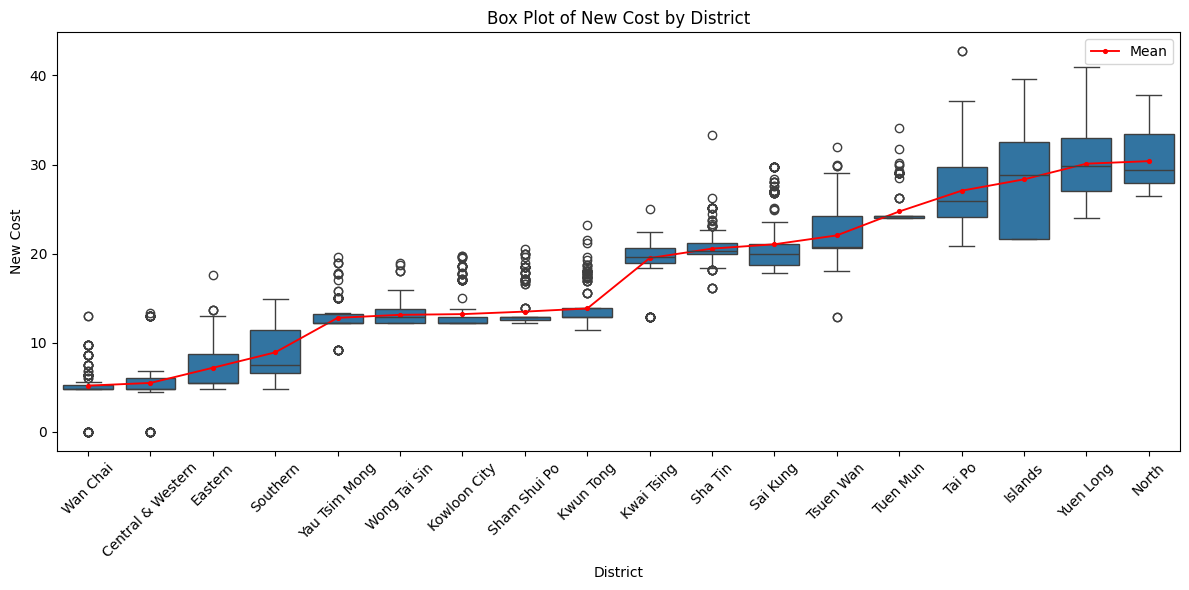

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate statistics
stats_by_district = cleaned_df.groupby('district')['new cost'].agg(['mean', 'max', 'min', 'std'])

# Sort by mean
sorted_stats = stats_by_district.sort_values('mean')

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='district', y='new cost', data=cleaned_df, order=sorted_stats.index)

# Overlay mean as a point plot
sns.pointplot(x=sorted_stats.index, y=sorted_stats['mean'], color='red', scale=0.5, label='Mean')

# Customize plot
plt.xticks(rotation=45)
plt.title('Box Plot of New Cost by District')
plt.xlabel('District')
plt.ylabel('Bus Cost')
plt.legend()
plt.tight_layout()

plt.show()

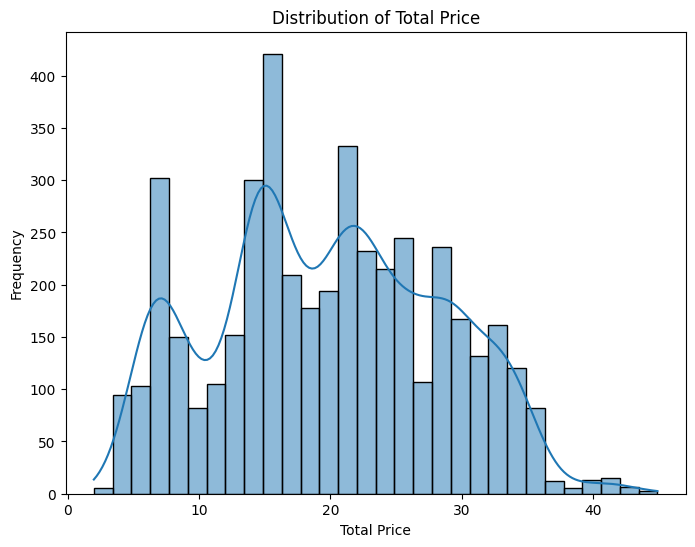

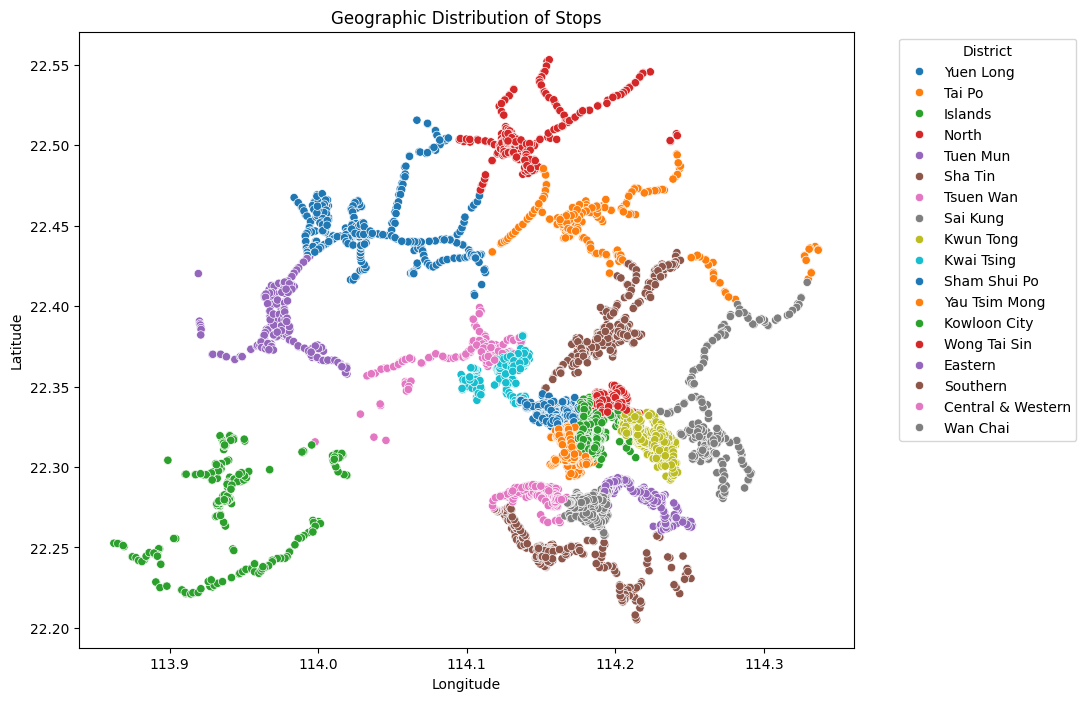

<ipython-input-32-420a8892b70c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['district_encoded'] = df['district'].astype('category').cat.codes


Correlation of new cost with other variables:
new cost            1.000000
total_distance2     0.722156
district_encoded    0.252149
Name: new cost, dtype: float64


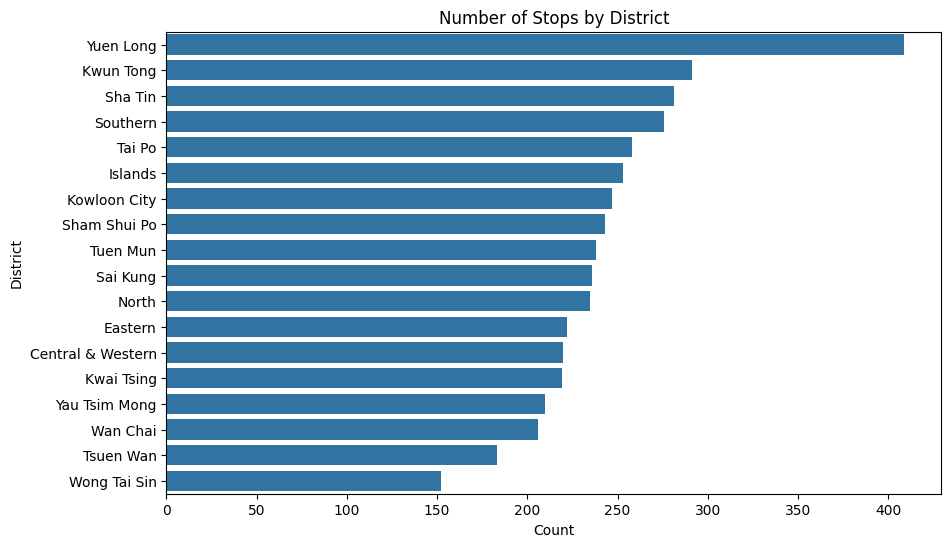

In [32]:
df = cleaned_df

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame (assuming it's named df)
# df = pd.read_csv('your_file.csv')  # Uncomment if loading from a file

# Basic Descriptive Statistics


# Distribution of Total Price
plt.figure(figsize=(8, 6))
sns.histplot(df['TOTAL_PRICE'], bins=30, kde=True)
plt.title('Distribution of Total Price')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of Longitude vs Latitude
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='district', palette='tab10')
plt.title('Geographic Distribution of Stops')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


df['district_encoded'] = df['district'].astype('category').cat.codes

# Calculate correlation
correlation_matrix = df[['new cost', 'total_distance2', 'district_encoded']].corr()

# Print correlation of 'new cost' with 'total_distance2' and 'district_encoded'
correlation_with_new_cost = correlation_matrix['new cost']

print("Correlation of new cost with other variables:")
print(correlation_with_new_cost)

# Count of Stops by District
plt.figure(figsize=(10, 6))
sns.countplot(y='district', data=df, order=df['district'].value_counts().index)
plt.title('Number of Stops by District')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

In [33]:
print(cleaned_df)

      STOP_ID  OFF_STOP_ID  TOTAL_PRICE                                 PATH  \
0       13130          401         44.9  [13130, 13131, 10000187, 9951, 401]   
1       12764          401         44.9  [12764, 12765, 10000187, 9951, 401]   
2       12731          401         44.9  [12731, 12732, 10000187, 9951, 401]   
3       12729          401         42.9         [12729, 10000187, 9951, 401]   
4       13131          401         42.9         [13131, 10000187, 9951, 401]   
...       ...          ...          ...                                  ...   
4379      425          233          2.0                           [425, 233]   
4380      616          518          2.0                           [616, 518]   
4381      319          130          2.0                           [319, 130]   
4382    13071          130          2.0                         [13071, 130]   
4383      467          130          2.0                           [467, 130]   

      new cost  total_distance2  total 

In [35]:
cleaned_df = cleaned_df.drop(columns=['total new price',"STOP_CODE","STOP_TYPE","LAST_UPDATE_DATE"])

In [36]:
from google.colab import files

cleaned_df.to_csv("Bus_imformation.csv")
# Replace 'your_file.csv' with the name of your file
files.download('Bus_imformation.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>